In [1]:
%matplotlib inline

# Simple Harmonic Motion

In this project, you will 
 - Describe the motion of a mass attached to a simple spring that obey's Hooke's law; 
 - Write a program that solves the **ordinary differential equations** that describe this system; 
 - and assess the accuracy of the numerical methods used.  

Consider an object of mass $m$ attached to a "spring" of spring constant $k$.  

**Goal**: Find the position of the object $x(t)$ as a function of time $t$, based on Newton's Second Law of Motion.   

For our simulations, use $m=0.1$, $k=2.0$, $x(t=0) = 6.0$, and $v(t=0) = 0.0$ as a benchmark. 

## 1. Interpret the Question

- Write down the equations of motion for this system.  It will be an **ordinary differential equation**. 
- Write down the **analytical solution** for the position of the object $x(t)$ as a function of time.  *You may be able to look this up in your physics textbook, ODE textbook, or attempt guess-and-check.*

#1 $$ m(d^2x)/(dt^2)= -kx $$
 $$ x(t) = Acos((2π / T )t) = Acos(ω0 t) $$
#2 $$ x(t) = x0cos(sqrt(k/m)*t) $$

## 2. Model the Physics

- Implement the solution of the simple harmonic oscillator equation with the Euler (forward difference) method, with one "large" time step value and with one "small" time step value.   

- Implement the solution of the simple harmonic oscillator equation with the Runge-Kutta method.  Use the same two choices for the time step variable that you used in Step 1.    

- Implement the solution of the simple harmonic oscillator equation with the ``scipy.integrate.odeint`` library routine.  Use the same two choices for the time step variable that you used in the previous two steps.   

- For each case, compare your numerical solution with the appropriate analytical solution.  *Make sure that all cases show a reasonable agreement with the true solution!* 

In [87]:
# Import everything we need at the beginning
%matplotlib inline
from pylab import *

# These allow you to customize plots.  
#   The settings here work well, but you may adjust if you want.
rcParams["figure.figsize"] = (8,8)
rcParams["font.size"] = 26
rcParams["xtick.labelsize"] = 20
rcParams["ytick.labelsize"] = 20

In [106]:
# In this cell, a function that solves the system with the Euler method is defined
# x0 is the initial position for the simulation
# v0 is the initial velocity for the simulation
# dt is the _________________________ TODO You tell me!
# Nsteps is the _____________________ TODO You tell me!
def Analytical(t):
    x = x0*cos(sqrt(k/m)*t)
    return (x)
def EulerMethod(x0, v0, dt, Nsteps):
    
    # A list for time values is provided
    t = arange(0.0, dt*Nsteps, dt)
    
    # preallocate the memory for x and v lists
    x = zeros(Nsteps)
    v = zeros(Nsteps)
    
    x[0] = x0 ### TODO
    v[0] = v0 ### TODO
    
    # The Euler method "process"
    for n in range(0, Nsteps-1):
        ax = ((-k*x[n])/m) ######  TODO Write here the acceleration formula
        v[n+1] = v[n] + ax*dt
        x[n+1] = x[n] + v[n]*dt
    # The list of time values, position values, and velocity values are output
    return t, x, v

# In this cell, use the EulerMethod function to solve the system and make the required plots.
# Let t, x, and v "catch" the output of the EulerMethod function...
t, x, v = EulerMethod(x0, v0, dt, Nsteps)  ### TODO Insert the appropriate input 



TypeError: 'numpy.ndarray' object is not callable

dt(.01) =  [  6.           6.           5.988      ..., -49.17271151 -54.0578813
 -58.84470566]
dt(.001) = [ 6.          6.          5.99988    ...,  4.14255895  4.12203433
  4.10142686]
Analytical= [ 6.          5.99994     5.99976    ...,  4.01985166  3.99989129
  3.97985092]


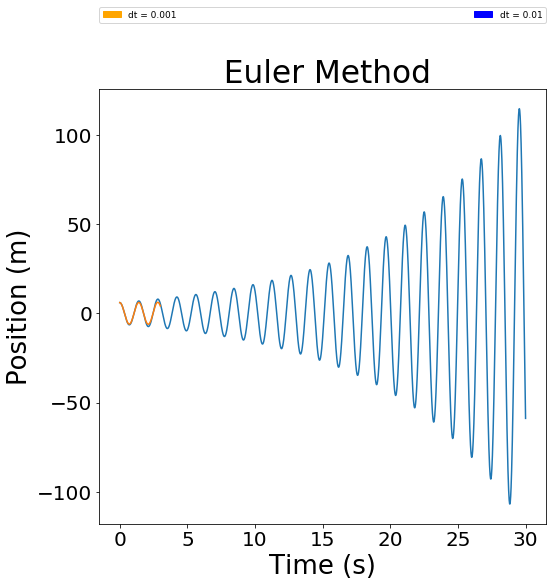

In [115]:
import  matplotlib.patches as mpatches
import matplotlib.pyplot as plt
orange_patch = mpatches.Patch(color = 'orange', label= 'dt = 0.001')
blue_patch = mpatches.Patch(color = 'blue', label= 'dt = 0.01')
plt.legend(handles=[orange_patch, blue_patch], bbox_to_anchor=(0. ,1.02 ,1.,0.3),loc=5, ncol=5,mode='expand',borderaxespad=0,prop={'size':9},numpoints=1)
title(' Euler Method')
xlabel('Time (s)')
ylabel('Position (m)')
# This cell defines the system's constants     # N/m     # kg
x0 = 6.0     # m
v0 = 0.0     # m/s
dt = .01
Nsteps = 3000

t, x, v = EulerMethod(x0, v0, dt, Nsteps)
print ('dt(.01) = ',x)
plot(t,x)

# This cell defines the system's constants     # N/m     # kg
x0 = 6.0     # m
v0 = 0.0     # m/s
dt = .001
Nsteps = 3000

t, x, v = EulerMethod(x0, v0, dt, Nsteps)
print ('dt(.001) =',x)
plot(t,x)

x = Analytical(t)

print ('Analytical=',x) 

SyntaxError: can't assign to function call (<ipython-input-105-120c44a1871a>, line 1)

In [97]:

# In this cell, a function that solves the system with the Runge-Kutta method is defined
# The Runge-Kutta method is a more powerful dynamics solver than the Euler method...

# This function defines the ACCELERATION formula.
# The acceleration can depend on time, position, and velocity.
# Just like other projects, we figure out the acceleration from 
# Newton's Second Law: Acceleration = Force / Mass
def Analytical(t):
    x = x0*cos(sqrt(k/m)*t)
    return (x)
def Accel(tn, xn, vn):
    a = -k * xn / m    # Hooke's law for a spring
                       #   For other physics situations with other forces,
                       #   this formula is the only thing that needs to be changed! 
    return a

# This function performs a time step, 
# using the Runge-Kutta "multiple mini time steps" method
def RKStep(tn, xn, vn, dt):
    # Inside here, the Runge-Kutta method performs four "mini" time steps...
    # Implement the Runge-Kutta method here. 
    dv1 = dt * Accel(tn, xn, vn)
    dx1 = dt * vn
    dv2 = dt * Accel(tn+0.5*dt, xn+0.5*dx1, vn+0.5*dv1)   
    dx2 = dt * (vn + 0.5*dv1)
    dv3 = dt * Accel(tn+0.5*dt, xn+0.5*dx2, vn+0.5*dv2)
    dx3 = dt * (vn + 0.5*dv2)
    dv4 = dt * Accel(tn+dt, xn+dx3, vn+dv3)
    dx4 = dt * (vn + dv3)
        
    vnew = vn + (dv1 + 2.0*dv2 + 2.0*dv3 + dv4)/6.0
    xnew = xn + (dx1 + 2.0*dx2 + 2.0*dx3 + dx4)/6.0
    
    return xnew, vnew

def RKSolution(x0, v0, dt, Nsteps):
    t = arange(0.0, dt*Nsteps, dt)
    
    x = zeros(Nsteps)
    v = zeros(Nsteps)
    
    x[0] = x0
    v[0] = v0
    
    for n in range(0, Nsteps-1):
        x[n+1], v[n+1] = RKStep(t[n], x[n], v[n], dt)
        
        
    return t, x, v

dt(.01) =  [ 6.          5.994001    5.976016   ..., -2.9406929  -3.17156494
 -3.3960949 ]
dt(.001) =  [ 6.          5.99994     5.99976    ...,  4.01985166  3.99989129
  3.97985092]
Analytical = [ 6.          5.99994     5.99976    ...,  4.01985166  3.99989129
  3.97985092]


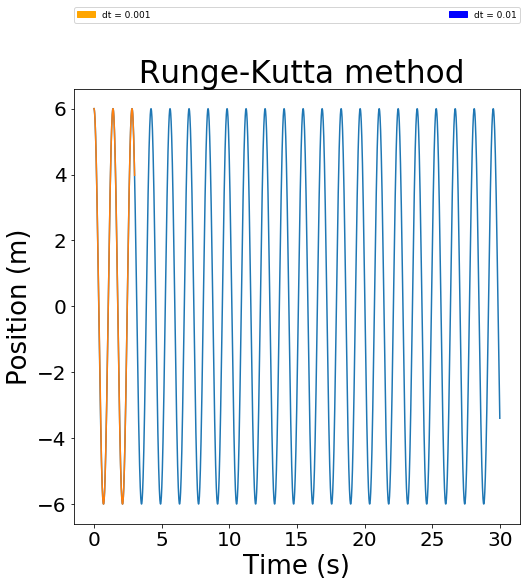

In [116]:

import  matplotlib.patches as mpatches
import matplotlib.pyplot as plt
orange_patch = mpatches.Patch(color = 'orange', label= 'dt = 0.001')
blue_patch = mpatches.Patch(color = 'blue', label= 'dt = 0.01')
plt.legend(handles=[orange_patch, blue_patch], bbox_to_anchor=(0. ,1.02 ,1.,0.3),loc=5, ncol=5,mode='expand',borderaxespad=0,prop={'size':9},numpoints=1)
title(' Runge-Kutta method')
xlabel('Time (s)')
ylabel('Position (m)')
# This cell defines the system's constants     # N/m     # kg
x0 = 6.0     # m
v0 = 0.0     # m/s
dt = .01
Nsteps = 3000

t, x, v = RKSolution(x0, v0, dt, Nsteps)

print('dt(.01) = ', x)
plot(t,x)

# This cell defines the system's constants     # N/m     # kg
x0 = 6.0     # m
v0 = 0.0     # m/s
dt = .001
Nsteps = 3000

t, x, v = RKSolution(x0, v0, dt, Nsteps)
print('dt(.001) = ', x)

plot(t,x)

x = Analytical(t)
print('Analytical =',x)

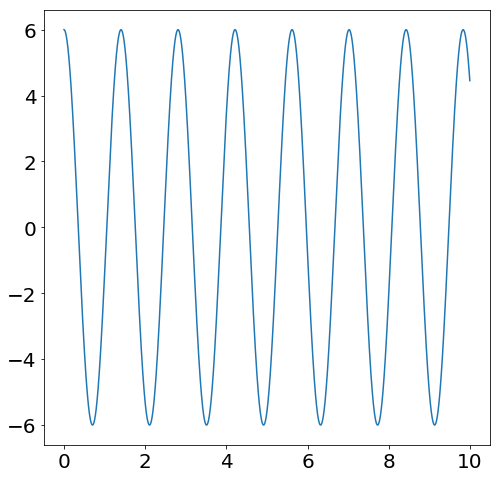

[ 6.          4.6872723   1.32350673 -2.61939357 -5.41611029 -5.84286737
 -3.71292611  0.04170235  3.77808295  5.86126531  5.37969889  2.54410554
 -1.40472724 -4.73888516 -5.99942083 -4.63475427 -1.24203064  2.69417576
  5.45147562  5.8233408   3.64705203 -0.1250989  -3.84250963 -5.87853053
 -5.34224781 -2.46832576  1.48567606  4.78958177  5.9976817   4.58134025
  1.16031447 -2.76843704 -5.48578708 -5.80268863 -3.58047308  0.20847136
  3.90619381  5.89465978  5.30376435  2.39206912 -1.56633801 -4.83935337
 -5.99478408 -4.52704142 -1.07837421  2.84216354  5.51903903  5.78091571
  3.51320266 -0.29180347 -3.96912338 -5.90965044 -5.26425649 -2.31535044
  1.64669731  4.88818992  5.99072817  4.47186777  0.99622556 -2.91534108
 -5.55122456 -5.75802563 -3.44525308  0.37507942  4.03128618  5.92349901
  5.22373106  2.23818399 -1.7267386  -4.93608193 -5.9855145  -4.41582978
 -0.91388408  2.98795532  5.58233731  5.73402268  3.37663756 -0.45828288
 -4.09266984 -5.93620287 -5.18219622 -2.160585    1

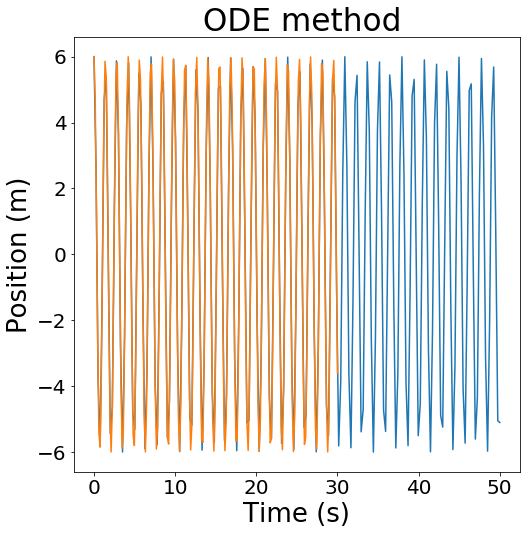

In [117]:
def Analytical(t):
    x = x0*cos(sqrt(k/m)*t)
    return (x)
from scipy.integrate import odeint


t = linspace(0.0, 50,200)
y0 = array([x0,v0])
def func(y,t):
    dydt = zeros(2)
    dydt[0] = y[1]
    dydt[1] = (-k*y[0])/m
    return dydt

y = odeint(func,y0,t)
plot(t,y[:,0])

t = linspace(0.0, 30,200)
y0 = array([x0,v0])
def func(y,t):
    dydt = zeros(2)
    dydt[0] = y[1]
    dydt[1] = (-k*y[0])/m
    return dydt

y = odeint(func,y0,t)
print(y[:,0])
plot(t,y[:,0])
title(' ODE method')
xlabel('Time (s)')
ylabel('Position (m)')

x = Analytical(t)
print('Analytical =',x)

# 3. Present and Interpret Results

 - From your three numerical solutions, produce a plot of **total mechanical energy** vs. time.  
     - What do you **expect** to be true about total mechanical energy as a function of time for this system?  
     - For which method(s) do you observe that to be true?  
 - Summarize your overall findings.  
     - Which method(s) do the best job of accurately solving for the motion of this system?  
     - Imagine exploring a physical system where we do **not** have an "easy" analytical or known solution.  What kind of things would you analyze, in order to have confidence that your numerical solution is accurate?  

In [118]:
### RECOMMENDATION: 
### When your code in Part 2 works, copy it into this cell.  
### Then, make the modifications here to make your EulerMethod function
###      return a list for the Total Mechanical Energy (in addition to the other output). 
# This cell defines the system's constants
k = 2.0               #  constant N/m
m = 0.1               # mass kg
x0 = 6.0              #  y position in meters
v0 = 0.0              #  initial velocity in the  y direction in m/s
w = ((k/m)**0.5)      # angular frequency

dt = 0.01
Nsteps = 2000
# In this cell, a function that solves the system with the Euler method is defined
# x0 is the initial position for the simulation
# v0 is the initial velocity for the simulation
# dt is the _________________________ TODO You tell me!
# Nsteps is the _____________________ TODO You tell me! 
def EulerMethod(x0, v0, dt, Nsteps):
    t = arange(0.0, dt*Nsteps, dt)  # A list for time values is provided
    # preallocate the memory for x and v lists
    v = zeros(Nsteps)
    x = zeros(Nsteps)
    ME = zeros(Nsteps)

    x[0] = x0
    v[0] = v0

    # The Euler method "process"
    for n in range(0, Nsteps-1):
        a = ((-k*x[n])/(m)) # gravitational force pulld the spring down in the y direction, no acceleration in the x direction
        v[n+1] = v[n] + a*dt
        x[n+1] = x[n] + v[n]*dt
        ME[n+1] = (0.5*m*(v[n]**2)) + (0.5*k*(x[n]**2))
    # The list of time values, position values, and velocity values are output
    return t, x, v, ME

Text(0,0.5,'Mechanical Energy (J)')

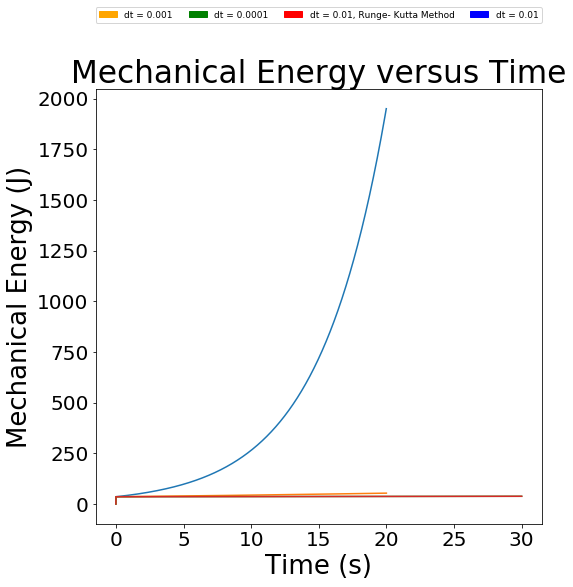

In [119]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
orange_patch = mpatches.Patch(color = 'orange', label= 'dt = 0.001')
green_patch = mpatches.Patch(color = 'green', label= 'dt = 0.0001')
red_patch = mpatches.Patch(color='red', label='dt = 0.01, Runge- Kutta Method')
blue_patch = mpatches.Patch(color='blue', label='dt = 0.01')
plt.legend(handles=[orange_patch, green_patch, red_patch, blue_patch], bbox_to_anchor=(0. ,1.02 ,1.,0.3),loc=5, ncol=5,mode='expand',borderaxespad=0,prop={'size':9},numpoints=1)

t, x, v, ME = EulerMethod(x0, v0, dt, Nsteps)
plot(t, ME)

dt = 0.001
Nsteps = 20000
t, x, v, ME = EulerMethod(x0, v0, dt, Nsteps)
plot(t, ME)

dt = 0.0001
Nsteps = 300000
t, x, v, ME = EulerMethod(x0, v0, dt, Nsteps)
plot(t,ME)

dt = 0.01
Nsteps = 150000000
plot(t,ME)

title('Mechanical Energy versus Time')
xlabel('Time (s)')
ylabel('Mechanical Energy (J)')

*Write your responses here.* 